In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
import seaborn as sns
from tqdm import tqdm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Loading the dataset

In [ ]:
d0= pd.read_csv('/content/drive/My Drive/MNIST/train.csv')
# save class labes into a variable l
l=d0['label']
d=d0.drop('label',axis=1)
print(d.shape)
print(l.shape)
del(d0)#free wasted memory

(42000, 784)
(42000,)


In [ ]:
d.head(5)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#splitting into train test and cross validation set
from sklearn.model_selection import train_test_split
X_train, X_1, y_train, y_1 = train_test_split(d, l, test_size=0.3, random_state=0)
X_cv, X_test,y_cv,y_test= train_test_split(X_1,y_1 ,test_size=0.50, random_state=0)
print("shape of training data ", X_train.shape)
print("shape of cross validation data ", X_cv.shape)
print("shape of test data ", X_test.shape)
#freeing useless memory
del(d)
del(l)

shape of training data  (29400, 784)
shape of cross validation data  (6300, 784)
shape of test data  (6300, 784)


#Visualizaing a random Digit


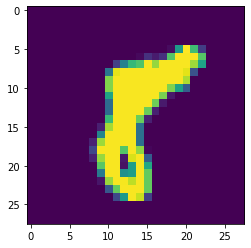

The above digit is 8


In [ ]:
#display or plot a number
ind = np.random.randint(X_train.shape[0])# displaying a digit present at a random index from the  training set
grid_data = X_train.iloc[ind].values.reshape(28,28)
plt.imshow(grid_data)
plt.show()
print("The above digit is " + str(y_train.iloc[ind]))

#Logistic regression Model

In [ ]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

##Training the model


In [ ]:
#trainig with L1 regularization
def Logistic_l1(X_train,X_cv,y_train,y_cv):
 best_C=0
 max_roc_auc= -1
 auc_train=[]
 auc_cv=[]
 best_clf=0
 Cs=[10000,5000,1000,500,100,50,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001,0.00005,0.00001] 
 probs=[] # probability values for best alpha
 for i in Cs[-19:]:
    clf= LogisticRegression(penalty='l1',C=i,solver='liblinear')
    clf.fit(X_train,y_train)
    pred_train= clf.predict_proba(X_train)
    pred_cv= clf.predict_proba(X_cv)
    auc_score_train= roc_auc_score(y_train,pred_train,multi_class='ovr')
    auc_score_cv= roc_auc_score(y_cv,pred_cv,multi_class='ovr')
    print("C-->", i,"   auc_cv-->",auc_score_cv,"   auc_train-->",auc_score_train)
    auc_train.append( auc_score_train)
    auc_cv.append( auc_score_cv)
    if(auc_score_cv>max_roc_auc):
      max_roc_auc= auc_score_cv
      best_C= i
      probs=pred_cv
      prob=pred_train
      best_clf= clf
 print(best_C, " is the best value of alpha with an roc_auc score of ", max_roc_auc)
 sns.set_style("darkgrid")
 plt.xscale("log")
 plt.plot(Cs,auc_train,'r-', label="training data")
 plt.plot(Cs,auc_cv,'g-', label="Cv data")
 plt.legend(loc='upper right')
 plt.title(r'Auc Score v/s C')
 plt.xlabel(r"C" ,fontsize= 12)
 plt.xlabel("auc value", fontsize= 12)
 plt.show()
 return best_clf

In [ ]:
#trainig with L2 regularization
def Logistic_l2(X_train,X_cv,y_train,y_cv):
 best_C=0
 max_roc_auc= -1
 auc_train=[]
 auc_cv=[]
 best_clf=0
 Cs=[10000,5000,1000,500,100,50,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001,0.00005,0.00001] 
 probs=[] # probability values for best alpha
 for i in Cs[-19:]:
    clf= LogisticRegression(penalty='l2',C=i)
    clf.fit(X_train,y_train)
    pred_train= clf.predict_proba(X_train)
    pred_cv= clf.predict_proba(X_cv)
    auc_score_train= roc_auc_score(y_train,pred_train,multi_class='ovr')
    auc_score_cv= roc_auc_score(y_cv,pred_cv,multi_class='ovr')
    print("C-->", i,"   auc_cv-->",auc_score_cv,"   auc_train-->",auc_score_train)
    auc_train.append( auc_score_train)
    auc_cv.append( auc_score_cv)
    if(auc_score_cv>max_roc_auc):
      max_roc_auc= auc_score_cv
      best_C= i
      probs=pred_cv
      prob=pred_train
      best_clf= clf
 print(best_C, " is the best value of alpha with an roc_auc score of ", max_roc_auc)
 sns.set_style("darkgrid")
 plt.xscale("log")
 plt.plot(Cs,auc_train,'r-', label="training data")
 plt.plot(Cs,auc_cv,'g-', label="Cv data")
 plt.legend(loc='upper right')
 plt.title(r'Auc Score v/s C')
 plt.xlabel(r"C" ,fontsize= 12)
 plt.xlabel("auc value", fontsize= 12)
 plt.show()
 return best_clf

In [ ]:
#trainig with elastic net regularization
def Logistic_elastic_net(X_train,X_cv,y_train,y_cv):
 best_C=0
 max_roc_auc= -1
 auc_train=[]
 auc_cv=[]
 best_clf=0
 Cs=[10000,5000,1000,500,100,50,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001,0.00005,0.00001] 
 probs=[] # probability values for best alpha
 for i in Cs[-19:]:
    clf= LogisticRegression(penalty='elasticnet',C=i, solver='saga,' ,l1_ratio= .5)
    clf.fit(X_train,y_train)
    pred_train= clf.predict_proba(X_train)
    pred_cv= clf.predict_proba(X_cv)
    auc_score_train= roc_auc_score(y_train,pred_train,multi_class='ovr')
    auc_score_cv= roc_auc_score(y_cv,pred_cv,multi_class='ovr')
    print("C-->", i,"   auc_cv-->",auc_score_cv,"   auc_train-->",auc_score_train)
    auc_train.append( auc_score_train)
    auc_cv.append( auc_score_cv)
    if(auc_score_cv>max_roc_auc):
      max_roc_auc= auc_score_cv
      best_C= i
      probs=pred_cv
      prob=pred_train
      best_clf= clf
 print(best_C, " is the best value of alpha with an roc_auc score of ", max_roc_auc)
 sns.set_style("darkgrid")
 plt.xscale("log")
 plt.plot(Cs,auc_train,'r-', label="training data")
 plt.plot(Cs,auc_cv,'g-', label="Cv data")
 plt.legend(loc='upper right')
 plt.title(r'Auc Score v/s C')
 plt.xlabel(r"C" ,fontsize= 12)
 plt.xlabel("auc value", fontsize= 12)
 plt.show()
 return best_clf

##Testing the model

In [ ]:
import scikitplot.metrics as skplt
def testing(clf,y_train, y_test):
  probs= clf.predict_proba(X_test)
  print("AUC score on test data", roc_auc_score(y_test,probs,multi_class='ovr'))
  prediction = clf.predict(X_test)
  skplt.plot_confusion_matrix(y_test,prediction)
  print("macro f1 score for data :",metrics.f1_score(y_test, prediction, average = 'macro'))
  print("micro f1 scoore for data:",metrics.f1_score(y_test, prediction, average = 'micro'))
  print("hamming loss for data:",metrics.hamming_loss(y_test,prediction))
  print("Precision recall report for data:\n",metrics.classification_report(y_test, prediction))

##Visualizing the weights

In [ ]:
def visualize(clf):
  coef= clf.coef_
  for i  in coef:
   grid_data = i.reshape(28,28)
   plt.imshow(grid_data)
   plt.show()

#Running the Model

##L1 regulariztion

In [ ]:
clf=Logistic_l1(X_train,X_cv,y_train,y_cv)

C--> 10000    auc_cv--> 0.9856838757762422    auc_train--> 0.9948015255825938
C--> 5000    auc_cv--> 0.9858135738082543    auc_train--> 0.9948023752696704
C--> 1000    auc_cv--> 0.9858818950470873    auc_train--> 0.9948141464236098
C--> 500    auc_cv--> 0.9859453110604856    auc_train--> 0.9948239047107365
C--> 100    auc_cv--> 0.9862165484069244    auc_train--> 0.9948270966994667
C--> 50    auc_cv--> 0.9863109979206179    auc_train--> 0.9948225512400468
C--> 10    auc_cv--> 0.9868125475103964    auc_train--> 0.9948130819810863


In [ ]:
testing(clf,y_train, y_test)

In [ ]:
visualize(clf)

##L2 regularization

C--> 10000    auc_cv--> 0.9934548536662018    auc_train--> 0.9962732807416292
C--> 5000    auc_cv--> 0.9934551382744796    auc_train--> 0.9962729397296325
C--> 1000    auc_cv--> 0.9934546499831663    auc_train--> 0.9962710668920561
C--> 500    auc_cv--> 0.9934543428991611    auc_train--> 0.996269502356528
C--> 100    auc_cv--> 0.9934531682515756    auc_train--> 0.9962651178858607
C--> 50    auc_cv--> 0.9934506422404606    auc_train--> 0.9962662352806598
C--> 10    auc_cv--> 0.9933828263509497    auc_train--> 0.9962711543625147
C--> 5    auc_cv--> 0.9934793072989413    auc_train--> 0.996270657423886
C--> 1    auc_cv--> 0.9934063320133724    auc_train--> 0.9963112276946914
C--> 0.5    auc_cv--> 0.9934738988910823    auc_train--> 0.9962356604895021
C--> 0.1    auc_cv--> 0.993344957933032    auc_train--> 0.9963350431002258
C--> 0.05    auc_cv--> 0.9934271875831424    auc_train--> 0.9962941145426909
C--> 0.01    auc_cv--> 0.9934241821390619    auc_train--> 0.9962818012720561
C--> 0.005    a

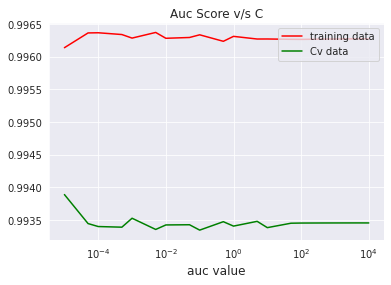

In [ ]:
clf=Logistic_l2(X_train,X_cv,y_train,y_cv)

AUC score on test data 0.9922599009638251
macro f1 score for data : 0.912805591677615
micro f1 scoore for data: 0.9141269841269841
hamming loss for data: 0.08587301587301588
Precision recall report for data:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95       600
           1       0.96      0.97      0.97       725
           2       0.91      0.88      0.90       618
           3       0.89      0.89      0.89       631
           4       0.92      0.94      0.93       615
           5       0.88      0.86      0.87       575
           6       0.94      0.96      0.95       615
           7       0.94      0.94      0.94       666
           8       0.87      0.86      0.86       623
           9       0.88      0.89      0.88       632

    accuracy                           0.91      6300
   macro avg       0.91      0.91      0.91      6300
weighted avg       0.91      0.91      0.91      6300



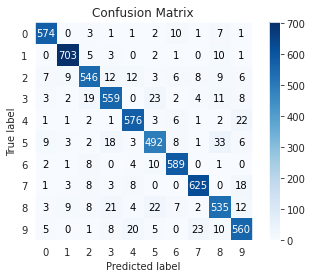

In [ ]:
testing(clf,y_train, y_test)